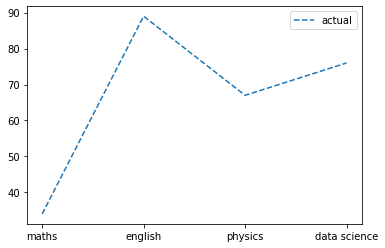

In [1]:
# original marks
marks = [34, 89, 67, 76]
subjects = ['maths', 'english', 'physics', 'data science']

# first predictions
pred1= [50, 50, 50, 50]

# importing the required modules
import matplotlib.pyplot as plt

# actual values
plt.plot(subjects, marks, label='actual' , linestyle='dashed')

# first predictions
# plt.plot(subjects, pred1, label='predicted', c='m')
plt.legend()
plt.show()

In [17]:
# importing the required modules
from sklearn import datasets
import pandas as pd
import numpy as np

# loading the iris dataset
dataset = datasets.load_iris()

# converting the data to DataFrame
data = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])

# printing the few rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
# splitting the dataset into input and output
Input = data.drop('target', axis=1)
Output =data['target']

In [5]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.30)

In [7]:
# importing the xgboost module
import xgboost as xgb

# Default parameters
xgboost_clf = xgb.XGBClassifier()

# training the model
xgboost_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [8]:
# printing default parameters values in XGBoost classifier
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [10]:
# testing the model
xgboost_preds = xgboost_clf.predict(X_test)

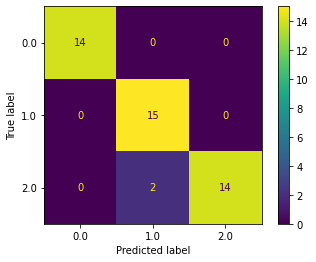

In [11]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test,xgboost_preds, labels=xgboost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgboost_clf.classes_)
disp.plot()
plt.show()

In [13]:
# importing the module
from sklearn.metrics import accuracy_score
# printing
print("The accuracy is: ", accuracy_score(y_test, xgboost_preds))

The accuracy is:  0.9555555555555556


In [2]:
import pandas as pd

In [3]:
# importing dataset 
data = pd.read_csv('house.csv')

# heading of the dataset
data.head()

,number_of_rooms,floor,area,latitude,longitude,price
0,1,1,58.0,38.585834,68.793715,330000
1,1,14,68.0,38.522254,68.749918,340000
2,3,8,50.0,NaN,NaN,700000
3,3,14,84.0,38.520835,68.747908,700000
4,3,3,83.0,38.564374,68.739419,415000


In [4]:
# input and output variables
Input = data.drop('price', axis=1)
Output = data.price

In [5]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.25)

In [6]:
# importing the module
import xgboost as xgb

# xgboost regressor
model = xgb.XGBRegressor()

# training the model
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [8]:
# making predictions
model_pred = model.predict(X_test)

In [10]:
import matplotlib.pyplot as plt

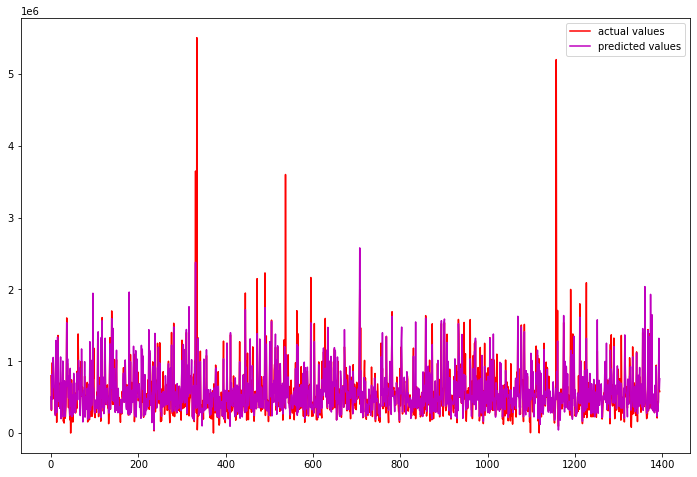

In [14]:
# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='r', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],model_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [16]:
#importing the r-square score
from sklearn.metrics import r2_score

# calculating the r score 
print('R score is :', r2_score(y_test, model_pred))

R score is : 0.5112299490783678


In [18]:
# loading the iris dataset
dataset = datasets.load_iris()

# converting the data to DataFrame
data = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])


# splitting the dataset into input and output
Input = data.drop('target', axis=1)
Output =data['target']

In [19]:
# importing all the necessary modules
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from numpy import arange

In [23]:
# fuction to create models
def build_models():
    
#     dic of models
    models = dict()
    
    # number of decision stumps
    decision_stump= [10, 50, 100, 500, 1000]
        
#    using for loop to iterate though trees
    for i in decision_stump:
        
#         building model with specified trees
        models[str(i)] = xgb.XGBClassifier(n_estimators=i)
    
#     returning the model
    return models

In [21]:
# function for the validation of model
def evaluate_model(model, Input, Ouput):
    
    # defining the method of validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    
    
    # validating the model based on the accurasy score
    accuracy = cross_val_score(model, Input, Ouput, scoring='accuracy', cv=cv, n_jobs=-1)
    
#     returning the accuracy score
    return accuracy

In [25]:
# calling the build_models function
models = build_models()

# creating list
results, names = list(), list()

# using for loop to iterate thoug the models
for name, model in models.items():
    
    # calling the validation function
    accuracy = evaluate_model(model, Input, Output)
    
    
    # appending the accuray socres in results
    results.append(accuracy)
    names.append(name)
    
    
    # printing the accuracy score
    print('---->Iterations (%s)---Accuracy( %.5f)' % (name, mean(accuracy)))

---->Iterations (10)---Accuracy( 0.95778)
---->Iterations (50)---Accuracy( 0.95556)
---->Iterations (100)---Accuracy( 0.94889)
---->Iterations (500)---Accuracy( 0.94444)
---->Iterations (1000)---Accuracy( 0.94889)


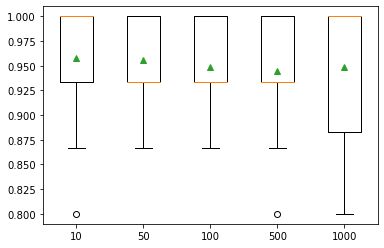

In [27]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

In [30]:
# creating the function 
def build_models():
    
#     creating dic of models
    models = dict()
    
    # explore features numbers from 1-4
    for i in range(1,5):
        
#         appending the models
        models[str(i)] = xgb.XGBClassifier(max_features=i)
    
#     returining the models
    return models

In [31]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    accuracy = evaluate_model(model, Input, Output)
    
#     storing the accurcy
    results.append(accuracy)
    names.append(name)
    
#     printing
    print('---->Features(%s)---Accuracy( %.5f)' % (name, mean(accuracy)))

---->Features(1)---Accuracy( 0.94889)
---->Features(2)---Accuracy( 0.94222)
---->Features(3)---Accuracy( 0.95111)
---->Features(4)---Accuracy( 0.94889)
[11:41:07] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:41:08] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:41:08] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false ala

[11:41:07] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:41:08] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:41:08] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being use

[11:41:07] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:41:08] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:41:08] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being use

[11:41:07] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:41:08] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:41:08] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being use

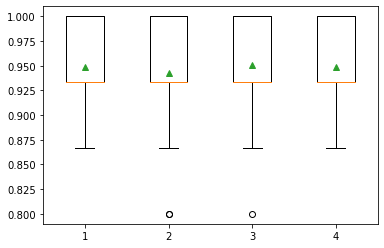

In [32]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

In [34]:
# creating the function
def build_models():
    
#     dic of models
    models = dict()
    
#     exploring different sample values
    for i in arange(0.1, 1.1, 0.1):
        
#         key value
        k = '%.1f' % i
    
#     appending the model
        models[k] = xgb.XGBClassifier(subsample=i)
    return models

In [36]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    accuracy = evaluate_model(model, Input, Output)
    
#     storing the accurcy
    results.append(accuracy)
    names.append(name)
    
#     printing
    print('Samples(%s)---Accuracy( %.5f)' % (name, mean(accuracy)))

Samples(0.1)---Accuracy( 0.95111)
Samples(0.2)---Accuracy( 0.95111)
Samples(0.3)---Accuracy( 0.94222)
Samples(0.4)---Accuracy( 0.94667)
Samples(0.5)---Accuracy( 0.94222)
Samples(0.6)---Accuracy( 0.95111)
Samples(0.7)---Accuracy( 0.94222)
Samples(0.8)---Accuracy( 0.94444)
Samples(0.9)---Accuracy( 0.95333)
Samples(1.0)---Accuracy( 0.94667)


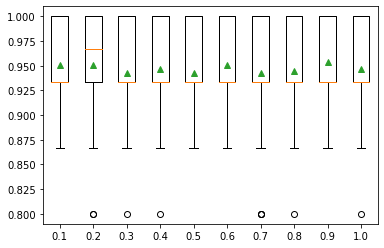

In [37]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

In [41]:
# creating function
def build_models():
    
#     creating dic of models
    models = dict()
    
#     different learning rates
    for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
        
#         key value
        k = '%.4f' % i
    
#     appending the models
        models[k] = xgb.XGBClassifier(learning_rate=i)
    return models

In [42]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    accuracy = evaluate_model(model, Input, Output)
    
#     storing the accurcy
    results.append(accuracy)
    names.append(name)
    
#     printing
    print('Learning Rate(%s)---Accuracy( %.5f)' % (name, mean(accuracy)))

Learning Rate(0.0001)---Accuracy( 0.96444)
Learning Rate(0.0010)---Accuracy( 0.95111)
Learning Rate(0.0100)---Accuracy( 0.96444)
Learning Rate(0.1000)---Accuracy( 0.95556)
Learning Rate(1.0000)---Accuracy( 0.94444)


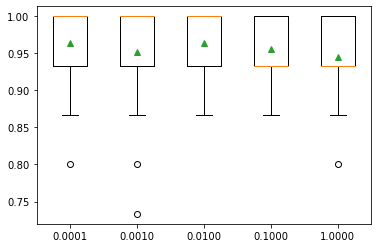

In [43]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

In [45]:
# building function for the model
def build_models():
    
#     creating dic of models
    models = dict()
    
#     specifying the depth of trees
    for i in range(1,12):
        
#         appending the models
        models[str(i)] = xgb.XGBClassifier(max_depth=i)
        
#   returining the model
    return models

In [47]:
# calling the function
models = build_models()

# creating lists 
results, names = list(), list()

# iterating through the models
for name, model in models.items():
    
    # calling the evalution function
    accuracy = evaluate_model(model, Input, Output)
    
    # appending the results
    results.append(accuracy)
    names.append(name)
    
#     printing the results
    print('Decision tree depth (%s)---Accuracy( %.5f)' % (name, mean(accuracy)))

Decision tree depth (1)---Accuracy( 0.93778)
Decision tree depth (2)---Accuracy( 0.94667)
Decision tree depth (3)---Accuracy( 0.94222)
Decision tree depth (4)---Accuracy( 0.95111)
Decision tree depth (5)---Accuracy( 0.95333)
Decision tree depth (6)---Accuracy( 0.95333)
Decision tree depth (7)---Accuracy( 0.94667)
Decision tree depth (8)---Accuracy( 0.94667)
Decision tree depth (9)---Accuracy( 0.95333)
Decision tree depth (10)---Accuracy( 0.94889)
Decision tree depth (11)---Accuracy( 0.95333)


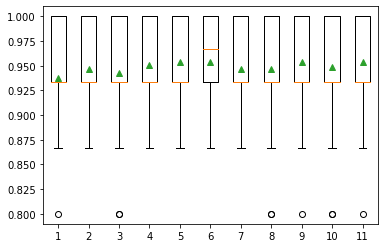

In [48]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)

# showing the plot
plt.show()

In [49]:
# defiing the model
model = xgb.XGBClassifier()


# creating a dict of grids
grid = dict()

# values for iteration
grid['n_estimators'] = [10, 50, 100, 500]

# values for learning rate
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# values for the sampel
grid['subsample'] = [0.5, 0.7, 1.0]

# values for teh depth of tree
grid['max_depth'] = [3, 4, 5]

In [50]:
# defining the cv
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)


# applying the gridsearchcv method
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# storing the values
grid_result = grid_search.fit(Input, Output)


# printing the best parameters
print("Accuracy score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Accuracy score: 0.964444 using {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
